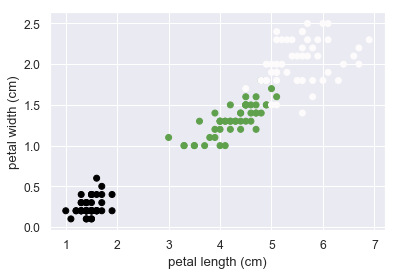

In [2]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

import numpy as np
import seaborn as sns
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score

sns.set(font_scale=1.1)
D = load_iris()
df = DataFrame(data=D.data, columns=D.feature_names)

plt.scatter(df['petal length (cm)'].values, df['petal width (cm)'].values, c=D.target, cmap='gist_earth')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(np.c_[df['petal length (cm)'].values, df['petal width (cm)'].values], D.target, test_size=.3, shuffle=True)

linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)

y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

print('Train error:', np.mean(cross_val_score(linear_model, X_train, y_train, cv=5)))
print('Test error:', np.mean(cross_val_score(linear_model, X_test, y_test, cv=5)))

Train error: 0.8476190476190476
Test error: 0.6888888888888889


In [4]:
X_train, X_test, y_train, y_test = train_test_split(np.c_[df['petal length (cm)'].values, df['petal width (cm)'].values], D.target, test_size=.3, shuffle=True)

model = MLPClassifier(max_iter=2500)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('Train error:', np.mean(cross_val_score(model, X_train, y_train)))
print('Test error:', np.mean(cross_val_score(model, X_test, y_test)))

Train error: 0.952629940865235
Test error: 0.9569444444444445


In [5]:
X = np.c_[df['petal length (cm)'].values, df['petal width (cm)'].values]

h = .009
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

### MLP Classifier

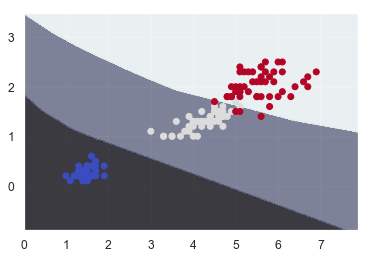

In [6]:
plt.contourf(xx, yy, model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), cmap=plt.cm.bone, alpha=0.8)
plt.scatter(df['petal length (cm)'].values, df['petal width (cm)'].values, c=D.target, cmap=plt.cm.coolwarm)
plt.show()

### Logistic Regression

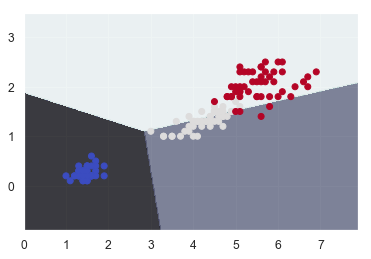

In [7]:
plt.contourf(xx, yy, linear_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), cmap=plt.cm.bone, alpha=0.8)
plt.scatter(df['petal length (cm)'].values, df['petal width (cm)'].values, c=D.target, cmap=plt.cm.coolwarm)
plt.show()